<a href="https://colab.research.google.com/github/tmegandoan/assignment2/blob/main/ttd6as_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [1]:
! git clone https://www.github.com/DS3001/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 9.27 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

# Answers:

1. This paper is about simple and efficient tools to use to help 'tidy' data. This paper explores methods to make cleaning data easier and less cumbersome.
2. The tidy data standard intends to facilitate initial exploration of data and simplify the developement of data analysis tools that work well together.
3.
  "Like Families, tidy datasets are all alike but ever messy dataset is messy in its own way": This means datasets that are messy often have different attributes that make them messy that is unique to this specific data. For example, a healthcare dataset that is full of missing rows is messy and is a different 'type' of messy then a survey dataset where people misspelled the same word over and over again.  

  "for a given dataset, it's usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general" : You can easily see that the rows are observations and the columns are variables, but being able to describe or talk about what the data actually means is more difficult because column names mean different things in different context.
4.
  Values: either numbers or strings that make up a dataset.
  Variables: all values belong to a variable, containing all values that measure the same underlying attribute.
  Observations: contains all values measured on the same unit across attributes
5. In tidy data, each variable forms a column, each observation forms a row, and each type of observational unit forms a table.
6.
5 most common problems with messy datasets:
  a. column headers are values and not variable names
  b. multiple variables are stored in one column
  c. variables are stored in both rows and columns
  d. multiple types of observational units are stored in the same table
  e. a single observational unit is stored in multiple tables

  the date in table 4 is messy because variables are both the rows and the columns and the column headers are values not variable names.

  Melting a dataset refers to the process of turning columns into rows so that each row represents one observation

7. Table 11 is messy because the data is very wide and is missing a lot of values. the dataset should be condensed in order to be able to concisely show trends.


8. If the data is only useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. He hopes that others will build on the framework to develop even better data storage strategies and better tools.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
airbnb = pd.read_csv('assignment2/data/airbnb_hw.csv')

In [ ]:
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


#### 2.1. Cleaning the price variable

To clean the price variable, I first observed the variable and looked at counts table. I noticed that a lot of the rows had commas within the values and that the column type was an object. When the values start to go over 1000, they always add a comma. I removed all of the commas and then coerced the value into a numeric as price should be.

In [ ]:
# checking what the value counts table is looking like to see if there is a lot of missing/random things
airbnb['Price'].value_counts()
airbnb['Price'].unique() # data type is an object and there are commas in the numbers, need to remove the commas and convert to a numeric

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [ ]:
#checking missings
airbnb[airbnb.Price.isnull()] # confirmed no missing values so we do not have to worry about simulating or filling in with mean or mode

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating


In [ ]:
# removing the , and replacing with nothing
airbnb['Price'] = airbnb['Price'].str.replace(',','')
airbnb['Price'].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '226'

In [ ]:
# coerce value to numeric:
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce') # Coerce the variable to numeric

In [ ]:
airbnb['Price'].unique()

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

#### 2.3 Cleaning Type

We saw that there was some discrepency in the way that the data was logged. For example, "Boat", "Boating", and "Boatomg" are probably all the same type but the people who logged the information had different ways of doing it. We will need to combine the information together. This also applies to the Unconfirmed and Unverified rows. There was also five rows with missing data.

To clean this column, we combined all of the rows that had boat, boating, and boatomg to one value: boating. We also did this for the unverified and unconfirmed values. For the rows that had NaN's, we replaced the empties with the value 'Unknown' so we wouldn't have to lose any information

In [ ]:
sharks = pd.read_csv('assignment2/data/sharks.csv')
sharks.head(5)

<ipython-input-13-561c10389cee>:1: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks = pd.read_csv('assignment2/data/sharks.csv')


,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# obvserving the data type to see what's wrong with it
sharks['Type'].value_counts()

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64

From here, we can see that there is some discrepency in the way that the data was logged. For example, "Boat", "Boating", and "Boatomg" are probably all the same type but the people who logged the information had different ways of doing it. We will need to combine the information together. This also applies to the Unconfirmed and Unverified rows.

In [ ]:
#checking missings
sharks[sharks.Type.isnull()] #confirmed that there are 5 rows that have missing values; since our dataset is so big, we can probably just delete these rows

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
239,239,2017.09.15.a,15-Sep-2017,2017.0,NaN,SAMOA,Upolu Island,Nofoali’i,Fishing,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,537,2015.07.27,27-Jul-2015,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087,4087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5025,5025,1936.09.11.R,Reported 11-Sep-1936,1936.0,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5864,5864,1890.03.03.R,Reported 03-Mar-1890,1890.0,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Boating
sharks['Type'] = np.where(sharks['Type'] == 'Boat','Boating',sharks['Type']) # replacing the boat values to boating for consistency
sharks['Type'] = np.where(sharks['Type'] == 'Boatomg','Boating',sharks['Type']) # replacing the boatomg values to boating for consistency

# Unconfirmed and unverified
sharks['Type'] = np.where(sharks['Type'] == 'Unconfirmed','Unverified',sharks['Type']) # replacing the Unconfirmed values to Unverified for consistency

In [ ]:
# replacing all values that are NaN with 'Unknown'
sharks['Type'] = np.where(sharks.Type.isnull() == True,'Unknown',sharks['Type']) # replacing the Unconfirmed values to Unverified for consistency

In [ ]:
sharks['Type'].value_counts()

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Boating                 202
Watercraft              142
Questionable             10
Unknown                   5
Unverified                2
Under investigation       1
Name: Type, dtype: int64

#### 2.3: Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [ ]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial = pd.read_csv(url,low_memory=False)

In [ ]:
pretrial['WhetherDefendantWasReleasedPretrial'].value_counts()

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64

In [ ]:
# renaming the column
pretrial = pretrial.rename(columns = {'WhetherDefendantWasReleasedPretrial' : 'released'})

In [ ]:
## replacing all values of 9 with np.nan in accordance to the code book
pretrial['released'] = pretrial['released'].replace(9, np.nan)

#### 2.4:Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
# if type of sentence == 4, the imposed sentence should be changed 0.0
pretrial['ImposedSentenceAllChargeInContactEvent'] = np.where(pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4.0, 0, pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'])

In [ ]:
pretrial['ImposedSentenceAllChargeInContactEvent'].value_counts() # confirm there are no 4's

0    17499
1     4299
2      914
9      274
Name: ImposedSentenceAllChargeInContactEvent, dtype: int64

In [ ]:
# if the type of sentence == 9, the imposed sentence should be changed to np.nan
pretrial['ImposedSentenceAllChargeInContactEvent'] = np.where(pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, np.nan, pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'])


In [ ]:
pretrial[pretrial.ImposedSentenceAllChargeInContactEvent.isnull()] # confirming the rows with 9 in the sentence type column has been changed to n/a

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
36,CDI00187,39,F,W,1985,32,3,32,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
268,ECC00155,272,M,W,1972,45,4,45,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
292,ECC00179,296,F,B,1990,27,3,27,99,99,...,,,,999,999,,1,1,0,Contact Event was solely related to a preexist...
498,ECC00385,502,M,W,1980,37,4,31,99,99,...,,,,999,999,,1,1,0,Contact Event was solely related to a preexist...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22965,SJA00322,22823,M,B,1976,41,4,41,99,99,...,,,,999,999,,1,1,0,Contact Event was solely related to a preexist...
22969,SJA00327,22827,F,W,1981,36,4,36,99,99,...,,,,999,999,,1,1,0,Contact Event was solely related to a preexist...
22970,SJA00328,22828,M,W,1975,42,4,42,99,99,...,,,,999,999,,1,1,0,Contact Event was solely related to a preexist...
22978,SJA00337,22836,F,W,1979,38,4,38,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

#### 3.1 Load the data

In [ ]:
college = pd.read_csv('assignment2/data/college_completion.csv')
college.head(5)

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


#### 3.2 What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [ ]:
# dimensions
print(college.shape, '\n')

# number of observations:
len(college)

# variables - each column
for col in college.columns:
    print(col)

(3798, 63) 

index
unitid
chronname
city
state
level
control
basic
hbcu
flagship
long_x
lat_y
site
student_count
awards_per_value
awards_per_state_value
awards_per_natl_value
exp_award_value
exp_award_state_value
exp_award_natl_value
exp_award_percentile
ft_pct
fte_value
fte_percentile
med_sat_value
med_sat_percentile
aid_value
aid_percentile
endow_value
endow_percentile
grad_100_value
grad_100_percentile
grad_150_value
grad_150_percentile
pell_value
pell_percentile
retain_value
retain_percentile
ft_fac_value
ft_fac_percentile
vsa_year
vsa_grad_after4_first
vsa_grad_elsewhere_after4_first
vsa_enroll_after4_first
vsa_enroll_elsewhere_after4_first
vsa_grad_after6_first
vsa_grad_elsewhere_after6_first
vsa_enroll_after6_first
vsa_enroll_elsewhere_after6_first
vsa_grad_after4_transfer
vsa_grad_elsewhere_after4_transfer
vsa_enroll_after4_transfer
vsa_enroll_elsewhere_after4_transfer
vsa_grad_after6_transfer
vsa_grad_elsewhere_after6_transfer
vsa_enroll_after6_transfer
vsa_enroll_elsewhere_af

In [ ]:
# looking at the first few rows
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


#### 3.3 Cross tabulate control and level. Describe the patterns you see.

In [ ]:
pd.crosstab(college['control'], college['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


For the 2 year college level, there are much more public schools compared to private schools for profit and not for profit. Among the 4 year college level, there are much more private not for profit schools compared to private for profit and public schools.

#### 3.4 For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.


<Axes: >

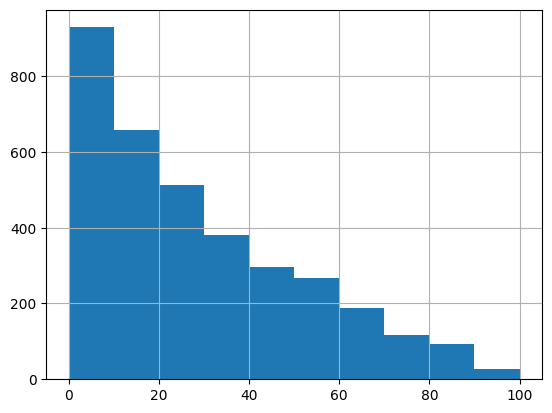

In [ ]:
# histogram
college['grad_100_value'].hist() # Here is a pretty good looking histogram

<Axes: ylabel='Density'>

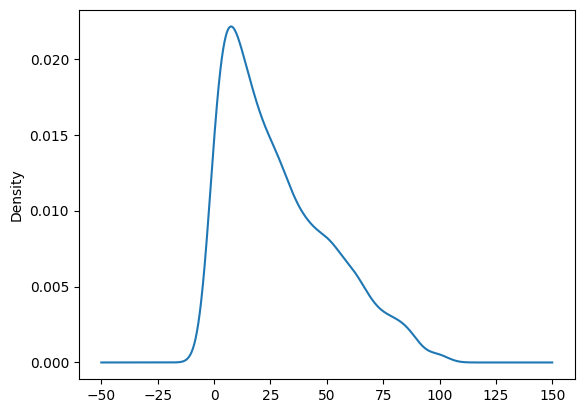

In [ ]:
# kernel density
college['grad_100_value'].plot.density()

<Axes: >

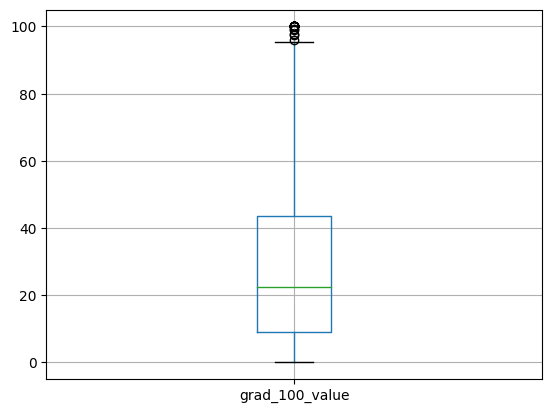

In [ ]:
# boxplot
college.boxplot(column = 'grad_100_value')

In [ ]:
# statistical desc
descr = college['grad_100_value'].describe() # Save the description as an object
print(descr,'\n')

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64 



#### 3.5 For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?

<Axes: ylabel='Density'>

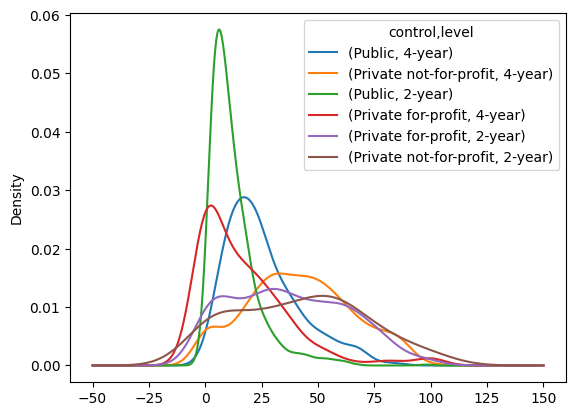

In [ ]:
# grouped kernel density by control and level
group_by = ['control','level']
var = 'grad_100_value'
college_wide = college.pivot(columns=group_by,values=var)
college_wide.plot.density()


There are much more public two year schools among this data set. The second and third most prevelant school type among this data is 4 year private for profit schools (red line) and 4 year public schools (blue line). In general, we can see that there are more public schools than private schools represented regardless of level

In [ ]:
# groupby and describe to make grouped calculations
var = 'grad_100_value'
group = ['control','level']

college.loc[:,['grad_100_value','control', 'level']].groupby(['control','level']).describe()


grad_100_value                             \
                                       count       mean        std  min   
control                level                                              
Private for-profit     2-year          461.0  37.197614  25.497380  0.0   
                       4-year          318.0  17.382704  20.788525  0.0   
Private not-for-profit 2-year           68.0  41.913235  28.348302  0.0   
                       4-year         1121.0  41.645674  23.243453  0.0   
Public                 2-year          926.0  12.400000  10.893600  0.0   
                       4-year          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
control                level                                
Private for-profit     2-year  15.800  33.9  57.800  100.0  
                       4-year   0.000  12.5  26.325  100.0  
Private not-for-profit 2-year  16.225  44.4  61.200  100.0  
                       4-year  25.000  41.0  57.800  100.0  
Public                 2-year   5.100   9.4  16.175   97.8  
                       4-year  13.600  21.8  33.800   86.3

On average, Private not for profit universities have a higher graduation rate. The mean graduation rate for both 2 year and 4 year private not for profit schools is close to 41%. Public universities have the lowest graduation rates at round 12% for 2 year schools and 25% for 4 year schools.

#### 3.6: Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

In [ ]:
# make a new column
college['levelXcontrol'] = college['level']+', '+college['control']

In [ ]:
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size,levelXcontrol
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0,"4-year, Public"
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0,"4-year, Public"
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0,"4-year, Private not-for-profit"
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0,"4-year, Public"
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0,"4-year, Public"


<Axes: ylabel='Density'>

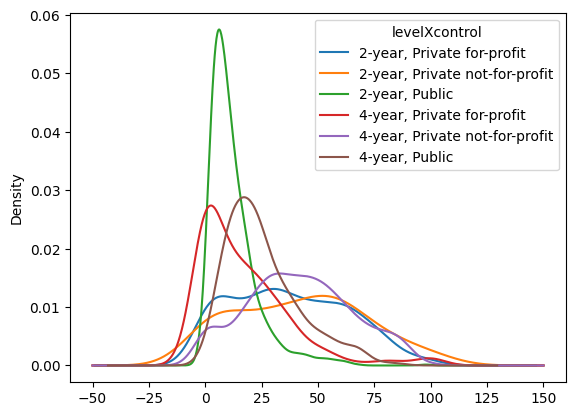

In [ ]:
# grouped kernel density plot:
group_by = ['levelXcontrol']
var = 'grad_100_value'
college_wider = college.pivot(columns=group_by,values=var)
college_wider.plot.density()

2 year public schools appear to have the highest graduation rate according to our graph

#### 3.7 Make a kernel density plot of aid_value. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by level and control. What explains the bi-modal nature of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control. --> finish later

<Axes: ylabel='Density'>

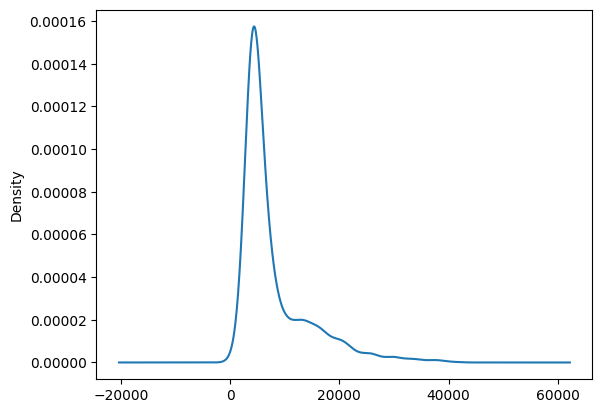

In [ ]:
var = 'aid_value'
college[var].plot.density() # That looks pretty bad

<Axes: ylabel='Density'>

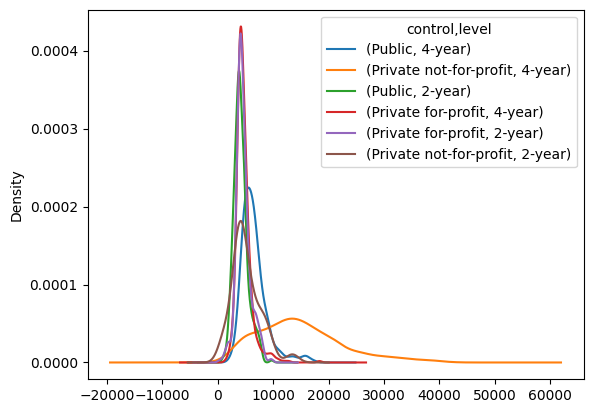

In [ ]:
groups = ['control','level']
newvar = 'aid_value'
college_wides = college.pivot(columns=groups,values=newvar)
college_wides.plot.density()


enter description here


#### 3.8 Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates? --> finish later

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

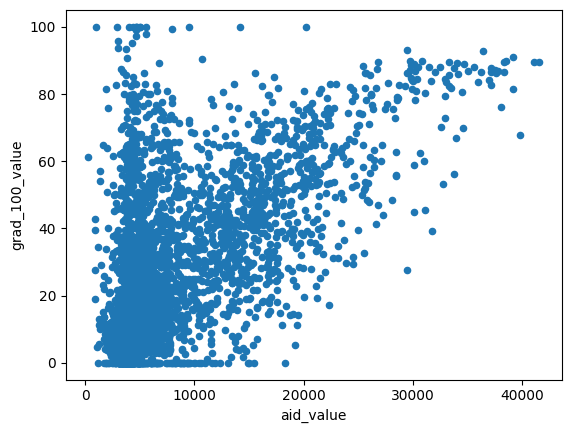

In [ ]:
college.plot.scatter(y='grad_100_value',x='aid_value')

as aid value increases, grad_100_value generally also increases. For schools with lower aid value, there seems to be a lot more variation in graduation level.

In [ ]:
import seaborn as sns


<Axes: xlabel='aid_value', ylabel='grad_100_value'>

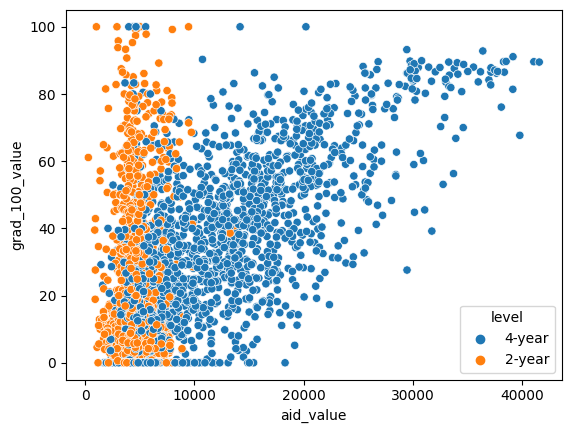

In [ ]:
sns.scatterplot(x = "aid_value", y = "grad_100_value", hue = "level",data = college)

among the two levels, we can see that 2 year colleges normally give much less aid compared to 4 year colleges. Schools that give more have 20,000 in aid are exclusivly 4 year colleges. For four year schools, it seems that there is a linear relationship between aid value and graduation value, where schools with higher aid value generally have higher graduatin values. it does not seem like there is a direct relationship between aid value and grad level for 2 year schools

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

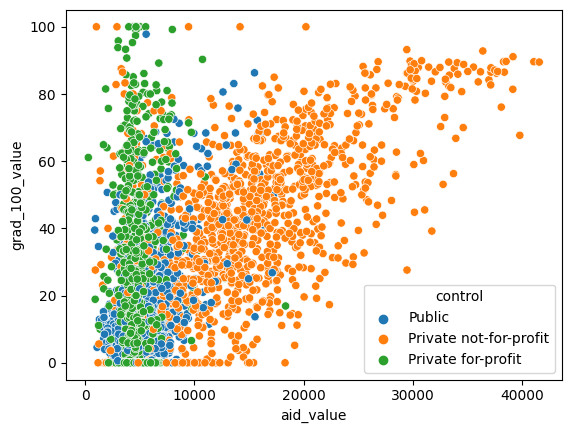

In [ ]:
sns.scatterplot(x = "aid_value", y = "grad_100_value", hue = "control",data = college)

among the three control groups, we can see that the majority of points that have a higher aid value are private not-for-profit schools. Private for profit schools generally do not give aid more than 10,000, and public schools generally give less than 20,000 in aid. there doesnt seem to be a direct correlation between aid value and grad value for public and private for profit schools, but for private not for profit schools, it seems that the higher aid the school gives, the higher the graduation level on average.

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.